In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header=None, encoding='utf-8')
y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0,2]].values

y.shape

(100,)

In [93]:
class Adaline:
  def __init__(self, lr=0.1, N=50, rstate=1):
    self.lr = lr
    self.N = N
    self.rstate = rstate
    

    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.rstate)
    self.W = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    
    self.b = np.float_(0.)
    self.losses = []
    print(self.W)
    for i in range(self.N):
      # Here goes activation if needed
      output = self.activation(self.forward(X))
      errors = (y - output)
      self.W += self.lr * 2.0 * X.T.dot(errors) / X.shape[0] # weights update
      self.b += self.lr * 2.0 * errors.mean() # bias update
      self.losses.append((errors**2).mean()) # log erros

    print(self.W)
    return self
      
  def predict(self, X):
    return np.where(self.forward(X) > 0.5, 1, 0)
  
  def forward(self, X):
    return np.dot(X, self.W) + self.b
  
  def activation(self, X):
    return X
      



[ 0.01624345 -0.00611756]
[-0.09340405  0.36873153]


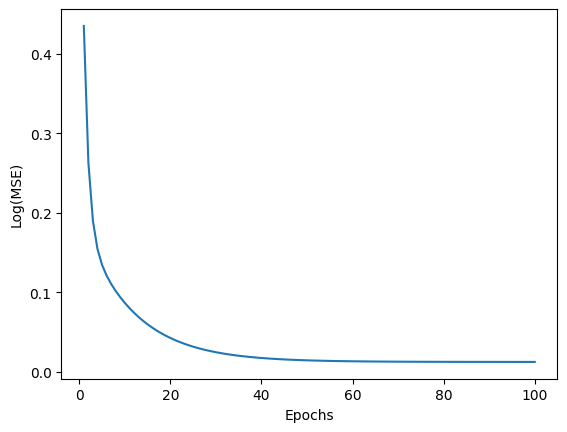

In [94]:


from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Min and max values of sepal length
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Min and max values of petal length
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # Grid for plotting
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label="Setosa" if cl == 0 else "Versicolor",
                    edgecolor='black')

ad1 = Adaline(lr=0.02, N=100).fit(X,y)
plt.plot(range(1, len(ad1.losses)+1), ad1.losses)
plt.xlabel('Epochs')
plt.ylabel('Log(MSE)')
plt.show()




In [92]:
ad1.predict(X[51])

array(1)